## TapDanceDecoder: MVP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,roc_curve, auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Get Data

In [2]:
#tap_df = pd.read_csv('../../../Source/Data/Train_data_n40.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data_full.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data_filterbanks.csv')
#tap_df = pd.read_csv('../../../Source/Data/audio_data_augmented.csv')
#tap_df = pd.read_csv('../../../Source/Data/train_data_reaugmented_pad_mfcc.csv')
#tap_df = pd.read_csv('../../../Source/Data/train_data_reaugmented_zcr.csv')
#tap_df = pd.read_csv('../../../Source/Data/train_data_augmented_stft_tempo.csv')
tap_df = pd.read_csv('../../../Source/Data/train_data_mfcc_zcr_energy_rmse_bpm.csv')


In [3]:
tap_df.head()
#tap_df.shape


,Path,Labels,0,1,2,3,4,5,6,7,...,500,501,502,503,504,505,506,507,508,BPM
0,../../../Source/Clean_train_clips/Train_augmen...,0,-366.181456,50.090022,-40.746004,16.056814,-10.389896,4.421432,-15.758563,-4.518935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.768029
1,../../../Source/Clean_train_clips/Train_augmen...,0,-356.338101,23.748945,-37.979718,12.604771,6.397428,-1.133098,-16.873502,-3.916460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.570312
2,../../../Source/Clean_train_clips/Train_augmen...,1,-505.759905,39.054364,-45.949153,10.960538,-5.345047,1.706360,-13.185875,-2.562860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287.109375
3,../../../Source/Clean_train_clips/Train_augmen...,1,-491.392420,11.197419,-23.719804,4.330406,-2.621682,-0.198983,-4.878444,0.852630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287.109375
4,../../../Source/Clean_train_clips/Train_augmen...,1,-495.901143,26.675723,-29.333735,10.520920,-5.969909,0.070803,-6.818391,-0.038340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287.109375


## Models

### Load the data

### Train

In [4]:
#
data = tap_df.iloc[:,2:].values # All features
#data = tap_df.iloc[:,2:22].values  # mfcc
#data = tap_df.iloc[:,22:185].values  # zcr
#data = tap_df.iloc[:,185:348].values  # energy
#data = tap_df.iloc[:,348:511].values  # rms energy
#data = tap_df.iloc[:,511:512].values  # tempo
#

#mfcc = tap_df.iloc[:,2:22]
#tempo = tap_df.iloc[:,511:512]
#mfcc_tempo = pd.concat([mfcc, tempo], axis=1)
#mfcc_tempo.to_csv('../../../Source/Data/train_mfcc_tempo.csv', index = False, header=True)
#data = mfcc_tempo.values
labels = tap_df['Labels']

In [5]:
#data
#labels


In [6]:
# This data gave me the best results!! (98%) 
# But I don't know if the feature extraction makes a lot of sense
#X_train = pd.read_csv('../../../Source/Data/X_train_mfccplus.csv')
#y_train = pd.read_csv('../../../Source/Data/y_train_mfccplus.csv')
#X_test = pd.read_csv('../../../Source/Data/X_test_mfccplus.csv')
#y_test = pd.read_csv('../../../Source/Data/y_test_mfccplus.csv')
#
#X_train = X_train.drop(['Path'], axis = 1).values
#X_test = X_test.drop(['Path'], axis = 1).values
#y_train = y_train.values.ravel()
#y_test = y_test.values.ravel()

In [7]:
X_train = data
y_train = labels

### Test

In [25]:
validate_df = pd.read_csv('../../../Source/Data/validate_data_mfcc_zcr_energy_rmse_bpm.csv')
test_df = pd.read_csv('../../../Source/Data/test_data_mfcc_zcr_energy_rmse_bpm.csv')
test_df = pd.concat([validate_df, test_df], axis=0)
test_df.shape

(114, 512)

In [26]:
test_data = test_df.iloc[:,2:].values # All features
#test_data = test_df.iloc[:,2:22].values  # mfcc
#test_data = test_df.iloc[:,22:185].values  # zcr
#test_data = test_df.iloc[:,185:348].values  # energy
#test_data = test_df.iloc[:,348:511].values  # rms energy
#test_data = test_df.iloc[:,511:512].values  # tempo


#test_mfcc = test_df.iloc[:,2:22]
#test_tempo = test_df.iloc[:,511:512]
#test_mfcc_tempo = pd.concat([test_mfcc, test_tempo], axis=1)
#test_mfcc_tempo.to_csv('../../../Source/Data/validate_mfcc_tempo.csv', index=False, header=True)
#test_data = test_mfcc_tempo.values

test_labels = test_df['Labels']

In [27]:
X_test = test_data
y_test = test_labels

In [28]:
#X_test

In [29]:
len(X_test)

114

## Logistic Regression

In [30]:
logreg = LogisticRegression(random_state=17)
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=17, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
predict = logreg.predict(X_test)
proba = logreg.predict_proba(X_test)

In [32]:
len(predict), len(y_test)

(114, 114)

In [33]:
results = pd.DataFrame()
results['True'] = y_test
results['Predict_lr'] = predict
results['Prob_0_lr'] = proba[:,0]

In [34]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['True'] == mistakes['Predict_lr'])]
mistakes

,True,Predict_lr,Prob_0_lr
2,0,1,0.339935
6,0,1,0.343795
13,0,1,0.186019
17,1,0,0.575799
18,1,0,0.624630
27,0,1,0.055621
32,0,1,0.004936
2,1,0,0.648441
5,0,1,0.232130
10,0,1,0.031208


In [35]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict)))

Accuracy score: 0.8157894736842105


### Visualizing results

In [36]:
def ROC_plot (testname, y_true, y_prob):
    
    logit_roc_auc = roc_auc_score(y_true, y_prob)
    
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate', size=15)
    plt.ylabel('True Positive Rate', size=15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title('ROC: ' + testname, size=25)
    
    plt.show()
    print ('ROC_AUC_Score: ' + str(logit_roc_auc))

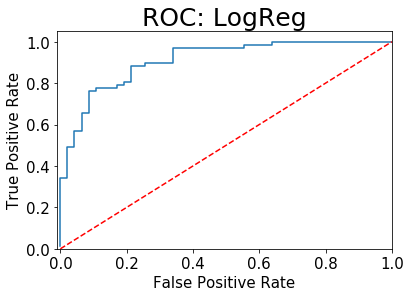

ROC_AUC_Score: 0.9091775166719593


In [37]:
ROC_plot('LogReg',  y_test, proba[:,1] )

## Can't see the forest for the trees.... Random Forest Classifier

In [38]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=17)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=17, verbose=0, warm_start=False)

In [39]:
predict_rf = rnd_clf.predict(X_test)
proba_rf = rnd_clf.predict_proba(X_test)

In [40]:
results['Predict_rf'] = predict_rf
results['Prob_0_rf'] = proba_rf[:,0]

In [41]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['True'] == mistakes['Predict_rf'])]
mistakes

,True,Predict_lr,Prob_0_lr,Predict_rf,Prob_0_rf
2,0,1,0.339935,1,0.413985
7,0,0,0.860174,1,0.398739
12,1,1,0.000017,0,0.518870
20,1,1,0.429092,0,0.566692
35,0,0,0.999997,1,0.482329
2,1,0,0.648441,0,0.604302
5,0,1,0.232130,1,0.278799
46,0,1,0.007734,1,0.277852
49,0,1,0.044606,1,0.306616
50,0,1,0.062942,1,0.409311


So where the Random Forest model makes mistakes, the LogReg model makes correct predictions. <br/>Perhaps a voting classifier would improve the accuracy even more.

In [42]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict_rf)))

Accuracy score: 0.8947368421052632


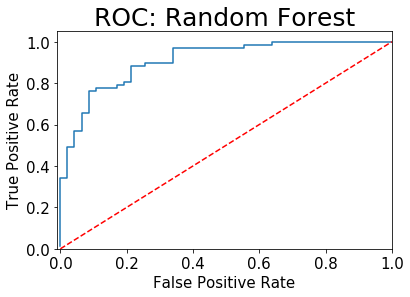

ROC_AUC_Score: 0.9091775166719593


In [43]:
ROC_plot('Random Forest', y_test, proba[:,1])

In [44]:
#results.to_csv('../../../Source/Data/results_sklearn_validatetest_all_augment.csv', index = False)

In [28]:
# What's really in this data that makes it so different?
#
#X_train = pd.read_csv('../../../Source/Data/X_train_mfccplus.csv')
#y_train = pd.read_csv('../../../Source/Data/y_train_mfccplus.csv')
#X_test = pd.read_csv('../../../Source/Data/X_test_mfccplus.csv')
#y_test = pd.read_csv('../../../Source/Data/y_test_mfccplus.csv')

In [29]:
#X_train.shape, X_test.shape

In [30]:
#X_train = pd.read_csv('../../../Source/Data/X_train_mfcc_zcr_energy_rmse_bpm.csv')
#y_train = pd.read_csv('../../../Source/Data/y_train_mfcc_zcr_energy_rmse_bpm.csv')
#
#inputs = X_train.iloc[:,1:21].values
#targets = y_train['Labels'].values
#
#print(inputs)

In [37]:
#pd.read_csv('../../../Source/Data/validate_mfcc_tempo.csv')